In [1]:
import matplotlib.pyplot as plt
import fastf1.plotting
from fastf1 import utils 
from chromato.spaces import convert
from chromato.spaces import HSV
import numpy as np
import time
import pandas as pd



In [4]:
def show_driver_quali_dif_per_lap(team_drivers, quali_session):
    driver0_lap = quali_session.pick_drivers(team_drivers[0]).pick_fastest()
    driver1_lap = quali_session.pick_drivers(team_drivers[1]).pick_fastest()
    
    
      
    fig, ax = plt.subplots(figsize=(13, 2))
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelleft=False,
        labelbottom=False)
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False  
        
    if type(driver0_lap) != type(None) and type(driver1_lap) != type(None):
            delta_time, ref_tel, compare_tel = utils.delta_time(driver0_lap, driver1_lap)
            max_delta = max(abs(min(delta_time)), abs(max(delta_time))) + 0.1 
            ax.vlines(x=circuit_info.corners['Distance'], ymin=-max_delta, ymax=max_delta, colors='white', linestyle='dotted')
            plt.axhline(y=0, color= team_color_2, linewidth=3)
            ax.plot(ref_tel['Distance'], delta_time, color=team_color, linewidth=3)
    
    delta_time_at_corner = [0]
    for idx_corner, corner in circuit_info.corners.iterrows():
            for idx_dist ,dist in ref_tel['Distance'].items():
                    if dist > corner['Distance']:
                            delta_time_at_corner.append(round(delta_time[idx_dist],3))
                            break
    delta_time_at_corner.append(round(delta_time.iloc[-1],3))
    delta_time_at_corner_diff = np.diff(delta_time_at_corner).tolist()
    delta_time_at_corner_diff = [round(elem, 3) for elem in delta_time_at_corner_diff]
    delta_per_team.update({f'{sub_session}_{team}': delta_time_at_corner_diff})
    
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelleft=False,
        labelbottom=False)
    plt.ylim(-max_delta, max_delta)
    plt.xlim(0, max(ref_tel['Distance']))
    
    minor_xticks = np.arange(0, max(ref_tel['Distance']), max(ref_tel['Distance'])/100)
    minor_yticks = np.arange(-max_delta, max_delta, (max_delta)/6)
    ax.set_xticks(minor_xticks, minor=True, labels=None)
    ax.set_yticks(minor_yticks, minor=True, labels=None)
    ax.grid(which='minor', alpha=0.1)
    plt.xlim(0, max(ref_tel['Distance']))
    fig.tight_layout()
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for t

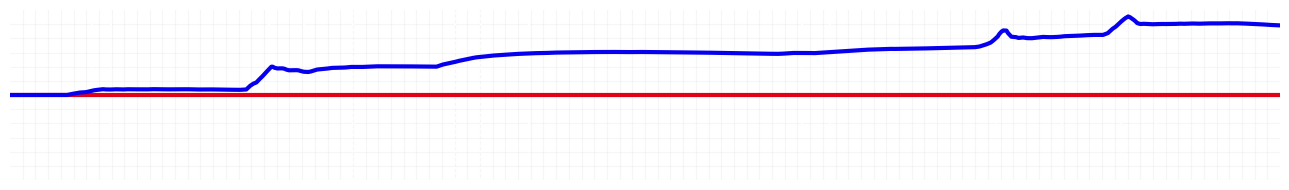

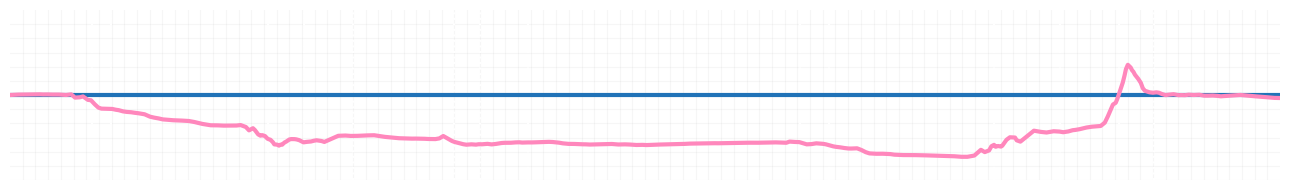

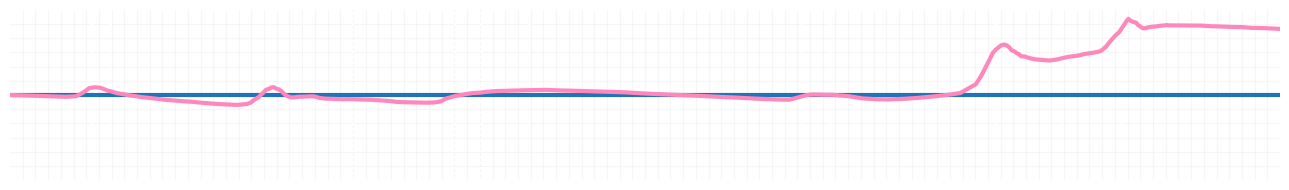

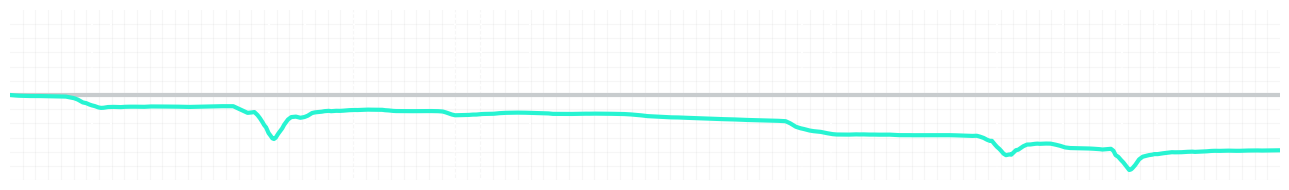

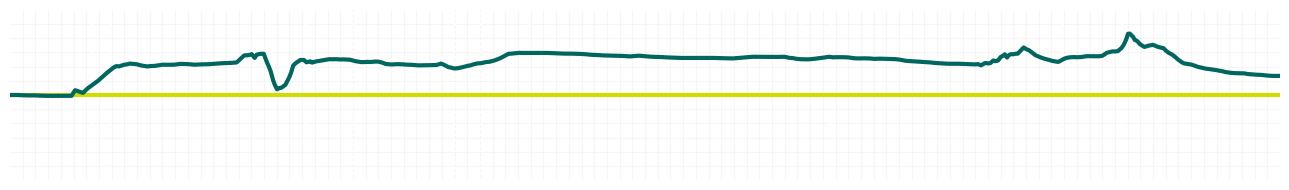

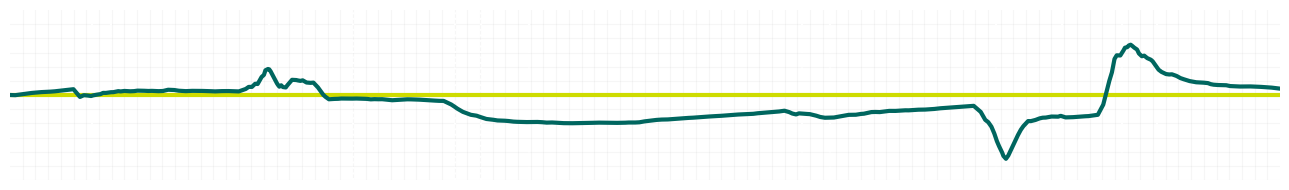

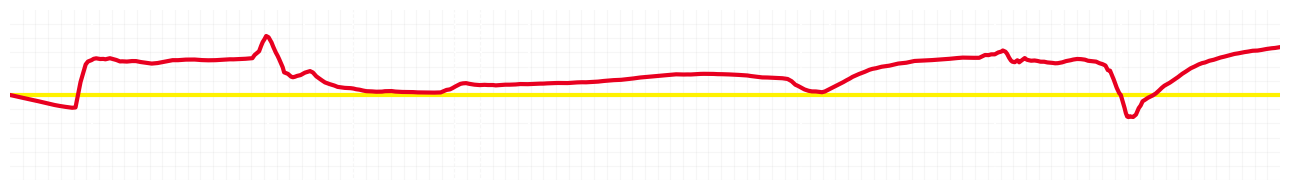

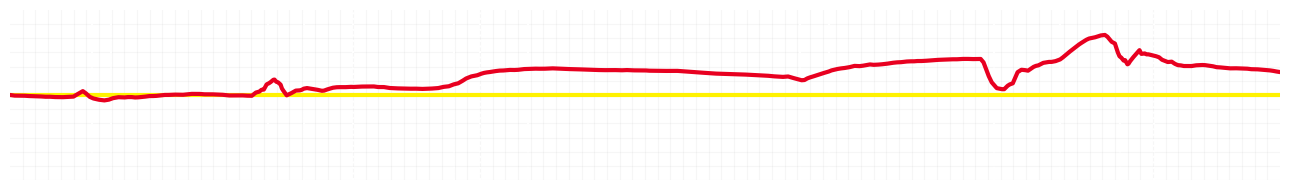

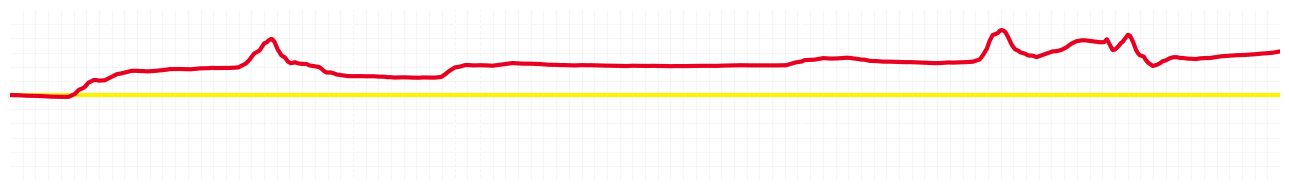

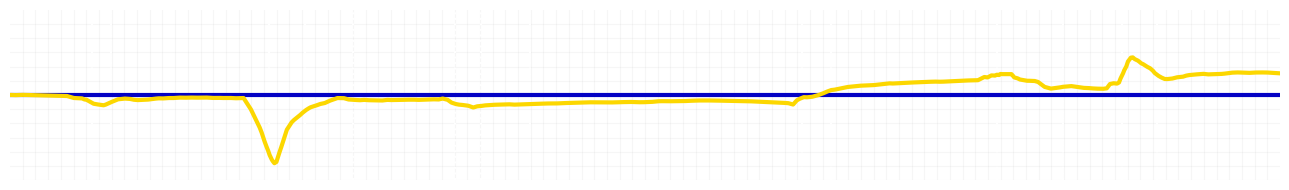

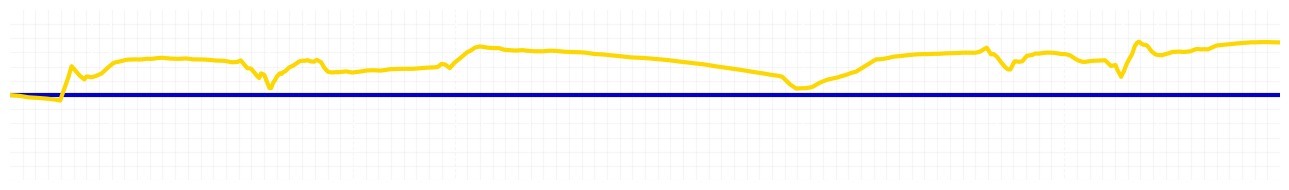

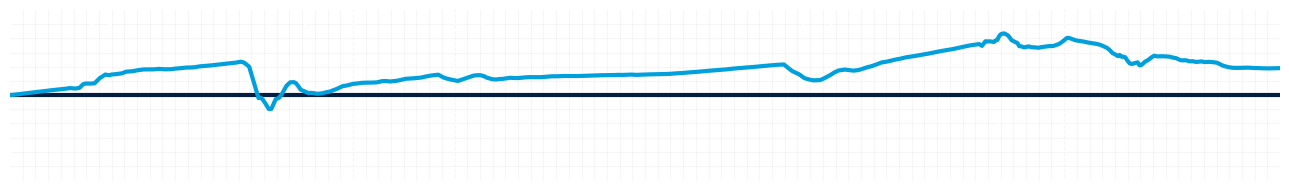

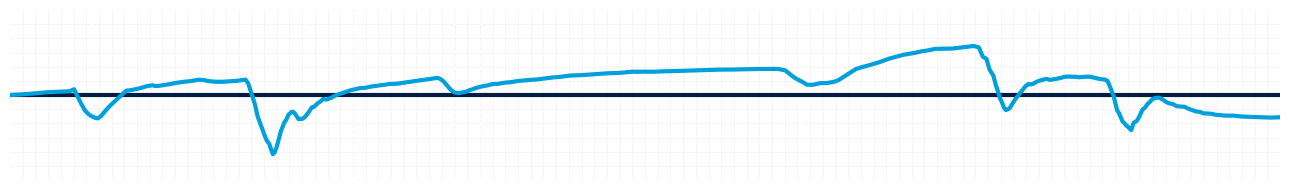

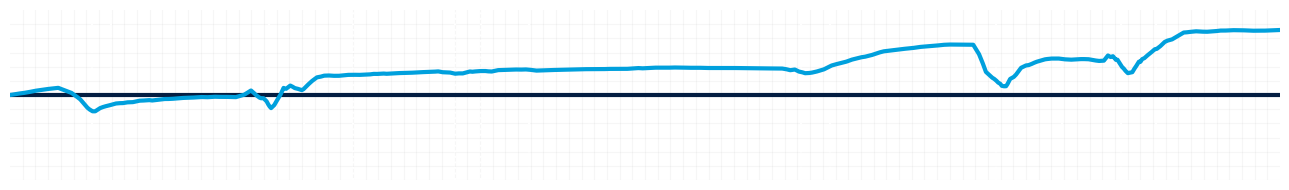

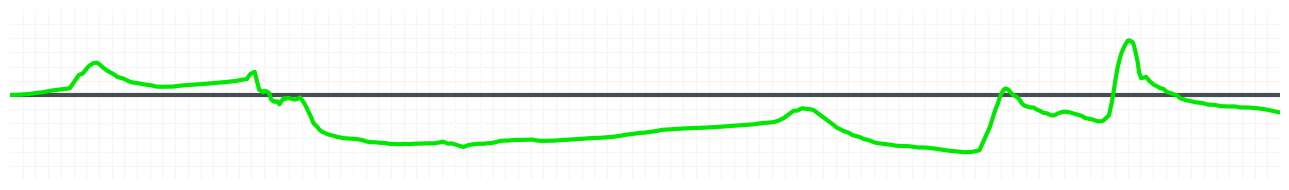

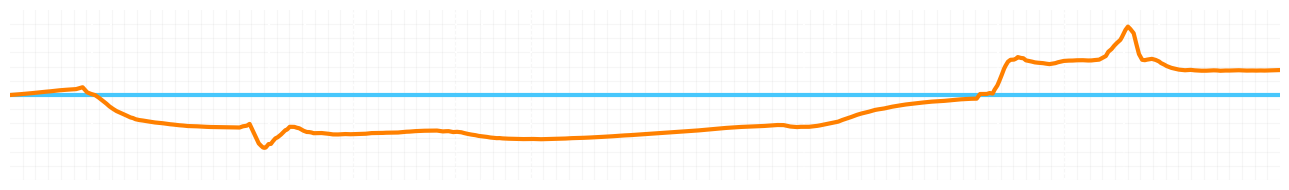

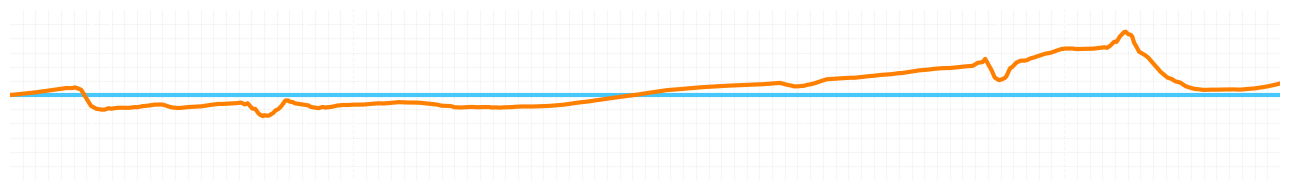

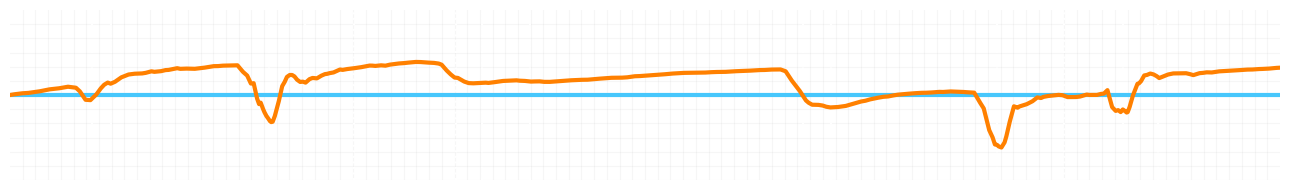

In [5]:
#year = int(input('Year ? '))
#race_number = int(input('Race Number ? '))
#race_session = input('Session ? ')

year = 2025
race_number = 1
race_session = 'Q'

session = fastf1.get_session(year, race_number, race_session)
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

teams = fastf1.plotting.list_team_names(session)
circuit_info = session.get_circuit_info()

delta_per_team = {}

start_time = time.time()

session= fastf1.get_session(year, race_number, race_session)
session.load()
q1, q2, q3 = session.laps.split_qualifying_sessions()
is_nat = np.isnat(q1['LapTime'])
q1 = q1[~is_nat]
is_nat = np.isnat(q2['LapTime'])
q2 = q2[~is_nat]
is_nat = np.isnat(q3['LapTime'])
q3 = q3[~is_nat]
teams = fastf1.plotting.list_team_names(session)


#circuit_info = session.get_circuit_info()

for idx, team in enumerate(teams):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    team_color = fastf1.plotting.get_team_color(team, session=session)
    df_color=pd.read_csv("../data/raw/second_color.csv", index_col='team')
    team_color_2 = df_color.loc[team][0]
    if team_drivers[0] in  q1['Driver'].values and team_drivers[1] in  q1['Driver'].values:
        sub_session = 'Q1'
        try:
            show_driver_quali_dif_per_lap(team_drivers, q1)
        except:
            print(f'No data in {sub_session} for {team}')
    if team_drivers[0] in  q2['Driver'].values and team_drivers[1] in  q2['Driver'].values:
        sub_session = 'Q2'
        try:
            show_driver_quali_dif_per_lap(team_drivers, q2)
        except:
            print(f'No data in {sub_session} for {team}')
    if team_drivers[0] in  q3['Driver'].values and team_drivers[1] in  q3['Driver'].values:
        sub_session = 'Q3'
        try:
            show_driver_quali_dif_per_lap(team_drivers, q3)
        except:
            print(f'No data in {sub_session} for {team}')